# PART A: The Effect of Laws Restricting Homeless Activies on Rate of Homelessness By State

### The first part of our homelessness study inquires whether state laws restricting the activities of homeless people such as laws banning camping in public, sleeping in public, living in vehicles, loitering and pandhandling have an effect on overall homelessness rates across the states of the U.S.

Our working H1 hypothesis in this section is that states with more laws restricting the activity of homeless persons as listed above will have lower rates of homeless persons than states with more lax laws. This section of our study seeks to determine whether this hypothesis is probable or whether the H0 null hypothesis, that more laws restricting homeless persons' activity do not have a measurable effect on rates of homelessness, is more likely.

In [1]:
# Import the necessary python modules for our project
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

We imported data from two sources for this section. The first is from the National Homelessness Law Center's 2021 study entitled "HOUSING NOT HANDCUFFS 2021: STATE LAW SUPPLEMENT" which summarizes the various laws by state restricting houseless person's activities. The original data was in the appendix of a pdf file which we converted into a .csv file. The link to the original data is: https://homelesslaw.org/wp-content/uploads/2021/11/2021-HNH-State-Crim-Supplement.pdf. The second file is a .csv file summarizing total population and rates per capita of houseless persons by state as of 2022. This file will be used widely across this entire study beyond this particular section

Note: "Restrictiveness Score" from the "2021-HNH-State-Crim-Supplement_Edited.csv" file is a score created by our team to summarize the number of boolean "True"s per state summarizing whether it is true or false if a state has a law restricting the activities of homeless persons such as setting up a tent in public. The more counts of "True" a state has, the higher its "Restrictiveness Score".

## Importing and merging the data

In [2]:
# Import data for homeless laws and homeless population in two csv files
policy_data_to_load = Path("2021-HNH-State-Crim-Supplement_Edited.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read homelessness laws and homelessness population by state csv files and store in Pandas dataframes
homeless_laws = pd.read_csv(policy_data_to_load)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged = pd.merge(homeless_laws, homeless_population, how="outer", on=["State", "State"])

## Renaming columns to be less cryptic and more intelligible

In [3]:
# Rename columns to be more intelligible to readers

homeless_merged = homeless_merged.rename(columns={'Sleeping in public state- wide':'Sleep in public statewide',
                                                'Sleeping in particular public places':'Sleep in specific public places',
                                                'Camping in public state- wide':'Camp in public statewide',
                                                 'Camping in particular public places': 'Camp in specific public places',
                                                 'Sitting/lying in particular public places':'Lying in specific public places',
                                                 'Lodging, living, or sleeping in vehicles (or parking a vehicle used as a lodging / living accom- modation)': 'Sleep/live in vehicle',
                                                 'Loitering / Loafing / Vagrancy state-wide' : 'Loitering statewide',
                                                 'Loitering / Loafing in particular public places': 'Loiter in specific public places',
                                                 'Standing in Roadway':'Standing in road',
                                                 'Panhandling in public places state- wide':'Panhandling statewide',
                                                 'Panhandling in particular public places':'Panhandling in specific public places',
                                                 'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged.head(3)

,State,Sleep in public statewide,Sleep in specific public places,Camp in public statewide,Camp in specific public places,Lying in specific public places,Sleep/live in vehicle,Loitering statewide,Loiter in specific public places,Standing in road,...,Panhandling in specific public places,Panhandling in particular ways,Restrictiveness Score,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,False,False,False,False,False,False,True,True,True,...,True,True,6,3752,7.4,539,1270,2482,169,308
1,Alaska,False,False,False,True,False,False,False,False,False,...,False,False,1,2320,31.7,576,560,1760,186,134
2,Arizona,False,False,False,True,False,False,True,True,True,...,True,True,6,13553,18.6,2476,2846,10707,917,857


### Using simple proportions calculation to derive column 'ChronicPer10k' to represent the chronic homelessness population as per capita rate

In [4]:
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged['ChronicPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['ChronicallyHomeless'] / homeless_merged['TotalPopulation']

## Reducing dataframe to only columns we need to test H1 hypothesis

In [5]:
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced = homeless_merged.loc[:, ['State','Restrictiveness Score','TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k']]
homeless_reduced.head(3)

,State,Restrictiveness Score,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k
0,Alabama,6,3752,7.4,539,1.063060
1,Alaska,1,2320,31.7,576,7.870345
2,Arizona,6,13553,18.6,2476,3.398037


### Scatterplot showing Total Per Capita rate of homelessness by state compared to "Restrictiveness Score"

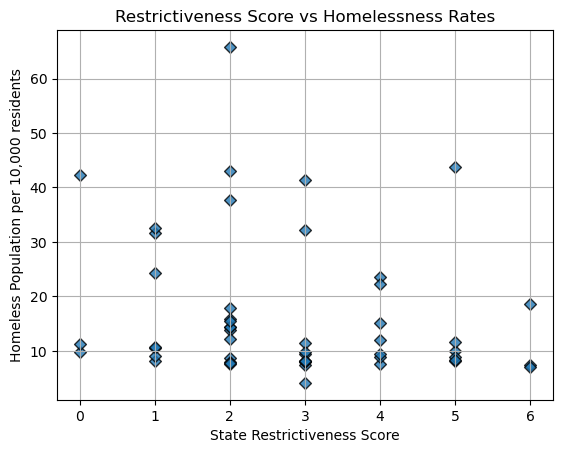

In [6]:
# Create plot state showing rate of homelessness per 10K residents in each state by "Restrictiveness Score"

plt.scatter(     
    homeless_reduced["Restrictiveness Score"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,
)

# Augment
plt.title("Restrictiveness Score vs Homelessness Rates")
plt.xlabel("State Restrictiveness Score")
plt.ylabel("Homeless Population per 10,000 residents")
plt.grid(True)

# Show plot
plt.show()

### Scatterplot showing Chronic Per Capita rate of homelessness by state compared to "Restrictiveness Score"

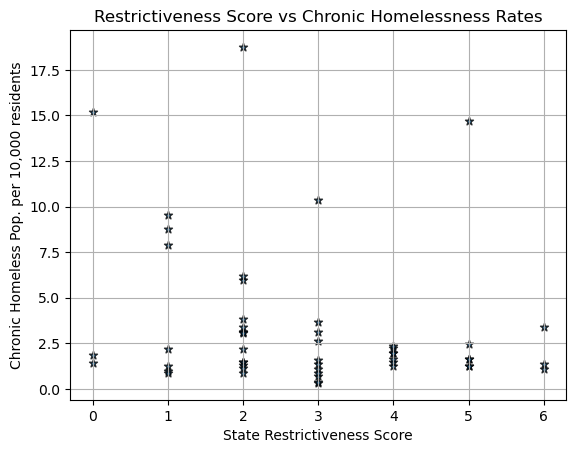

In [7]:
# Create plot state showing  rate of chronic homelessness per 10K residents in each state by "Restrictiveness Score"

plt.scatter(     
    homeless_reduced["Restrictiveness Score"],
    homeless_reduced["ChronicPer10k"],
    edgecolor="black",
    linewidths=1,
    marker="*", 
    alpha=0.8,
    #label="Cities"
)

# Augment
plt.title("Restrictiveness Score vs Chronic Homelessness Rates")
plt.xlabel("State Restrictiveness Score")
plt.ylabel("Chronic Homeless Pop. per 10,000 residents")
plt.grid(True)

# Show plot
plt.show()

### Creating a function called plot_linear_regression which will do a regression analysis on selected columns and print out the R value, R-squared value, and P-value

In [8]:
# Regression analysis function to be used throughout this study to derive and plot correlations

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("State Restrictiveness Score")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

### Creating linear regression comparing total Homeless Per Capita to state "Restrictiveness Score"

The r-squared value is: 0.037553417882135974
The r value is: -0.1937870426064033
The p value is: 0.17302000646945218


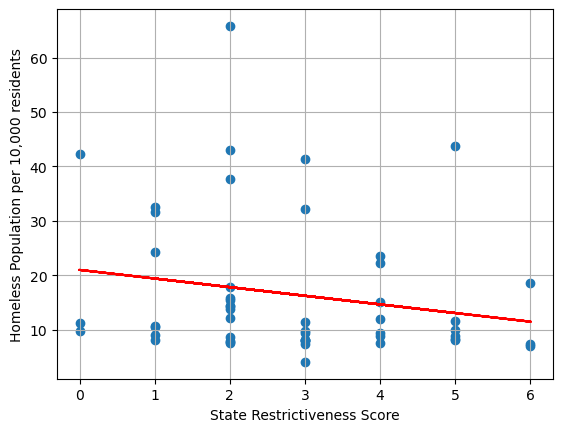

In [9]:
# Linear regression on Per10Residents Homeless compared to Restrictiveness Score
x_values = homeless_reduced["Restrictiveness Score"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Homeless Population per 10,000 residents", (50,-50))

Looking at this regression, we can see that there is a small negative correlation between rates of homelessness per capita compared to state "Restrictiveness Score". Rates of homelessness seem to be *slightly* lower when there are more laws on the books restricting homeless persons's activities, but the correlation is very small with an r-value of only -.2. Moreover the p-value of .17 is greater than the p-value of .05 or lower we would need to be able to jettison our null H0 hypothesis. Therefore we cannot determine from this data alone that there is a clear relationship between number of laws on the books in a state and the per capita rate of homelessness. More data and analysis would be needed to support such a hypothesis.

### Creating linear regression comparing chronic houseless per capita to state "Restrictiveness Score"

The r-squared value is: 0.0457813766117389
The r value is: -0.21396583047706216
The p value is: 0.1316412883612436


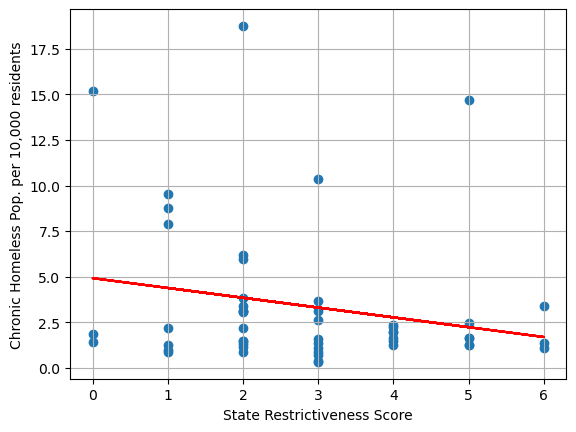

In [10]:
# Linear regression on Chronic Per10Residents Homeless compared to Restrictiveness Score
x_values = homeless_reduced["Restrictiveness Score"]
y_values = homeless_reduced["ChronicPer10k"]
plot_linear_regression(x_values, y_values, "Chronic Homeless Pop. per 10,000 residents", (50,-50))

Compared to the previous regression we find a *slightly* higher negative corellation between State "Restrictiveness Score" and rates of chronic homeless persons per capita. Yet again, the correlation with an r value of -.21 is still very low. And the p-value of .17 is still above the .05 threshhold we would need to be able to jettison our H0 null hypothesis here also.

# PART B: The Effect of Availability of Homeless Sheltering on Rate of Homelessness By State

### The second part of our study inquires whether greater availability of sheltering for homeless persons has an effect on overall homeless rates across states of the U.S.

Our working H1 hypothesis is that states with greater access to sheltering resources for the homeless will have greater rates of homelessness overall. This short data study seeks to determine whether this hypothesis is probable or whether the H0 null hypothesis, that access to homeless shelters will not have any effect on overall homeless rates, is more likely.

For this part of our study we imported three total data sources. The first and primary file is the .csv file summarizing total population and rates per capita of houseless persons by state as of 2022, the same one we used for the first part of our study. We then do two separate merges merging our first "Homeless Population by State.csv" with two different data sources detailing rates of availability of sheltering resources for the homeless. The first data source is "Sheltered Homeless Population.csv" and is from 2021. The second is from the U.S. department of Housing and Human Development's 2021 "Annual Homelessness Assesment Report(AHAR)" to the U.S. congress. This AHAR report was originally in the form of a .pdf file that was transformed into a .csv file by our team.

## Importing and merging the files for the first homeless sheltered data with the primary homeless overall population data

In [11]:
# Import data for homeless sheltered population and homeless total population in two csv files
sheltered_data_to_load_01 = Path("Sheltered Homeless Population.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read School and Student csv files and store in Pandas dataframes
homeless_sheltered_01 = pd.read_csv(sheltered_data_to_load_01)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged_01 = pd.merge(homeless_sheltered_01, homeless_population, how="outer", on=["State", "State"])

## Importing and merging the files for the second homeless sheltered data with the primary homeless overall population data

In [12]:
# Start process again this time using data from AHAR 2021 Homelessness Survey
# Import data for homeless sheletered population and homeless total population in two csv files
sheltered_data_to_load_02 = Path("2021-AHAR-Part-1_HomelessSheltered.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read School and Student csv files and store in Pandas dataframes
homeless_sheltered_02 = pd.read_csv(sheltered_data_to_load_02)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged_02 = pd.merge(homeless_sheltered_02, homeless_population, how="outer", on=["State", "State"])

## Renaming columns in first merge to be less cryptic and more intelligible

In [13]:
# Rename columns of first dataframe to be more intelligible to readers

homeless_merged_01 = homeless_merged_01.rename(columns={'percentage of homeless population that is sheltered':'percent population sheltered',
                                                 'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged_01.head(2)

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,2172,60,3752,7.4,539,1270,2482,169,308
1,Alaska,1963,85,2320,31.7,576,560,1760,186,134


## Renaming columns in second merge to be less cryptic and more intelligible

In [14]:
# Repeat process with second merged dataframe
# Rename columns to be more intelligible to readers

homeless_merged_02 = homeless_merged_02.rename(columns={'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged_02.head(2)

,State,Sheltered Homeless Population,Individuals Sheltered,Families Sheltered,Unaccompanied Youth Sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,1626.0,1165.0,461.0,55.0,3752,7.4,539,1270,2482,169,308
1,Alaska,1797.0,1295.0,502.0,195.0,2320,31.7,576,560,1760,186,134


### Using simple proportions calculation to derive new columns for first merge to represent chronic homeless and sheltered homeless as per capita rates of overall population

In [15]:
# Create new columns for first merged dataframe
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged_01['ChronicPer10k'] = \
    homeless_merged_01['Per10kResidents'] * homeless_merged_01['ChronicallyHomeless'] / homeless_merged_01['TotalPopulation']
# Create ShelteredPer10k column to calculate sheltered homeless population per 10,000 residents

homeless_merged_01['ShelteredPer10k'] = \
    homeless_merged_01['Per10kResidents'] * homeless_merged_01['sheltered homeless population'] / homeless_merged_01['TotalPopulation']

### Repeat same process for second merge creating columns to represent chronic homelessness, sheltered homelessness, individual homeless sheltered, sheltered homeless families, and sheltered homeless youth as per capita rates of overall population

In [16]:
# Create new columns for second merged dataframe
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged_02['ChronicPer10k'] = \
    homeless_merged_02['Per10kResidents'] * homeless_merged_02['ChronicallyHomeless'] / homeless_merged_02['TotalPopulation']

# Create ShelteredPer10k column to calculate sheltered homeless population per 10,000 residents

homeless_merged_02['ShelteredPer10k'] = \
    homeless_merged_02['Per10kResidents'] * homeless_merged_02['Sheltered Homeless Population'] / homeless_merged_02['TotalPopulation']

# Create IndvShelteredPer10k column to calculate sheltered individuals per 10,000 residents

homeless_merged_02['IndvShelteredPer10k'] = \
    homeless_merged_02['Per10kResidents'] * homeless_merged_02['Individuals Sheltered'] / homeless_merged_02['TotalPopulation']

# Create FamsShelteredPer10k column to calculate sheltered families per 10,000 residents

homeless_merged_02['FamsShelteredPer10k'] = \
    homeless_merged_02['Per10kResidents'] * homeless_merged_02['Families Sheltered'] / homeless_merged_02['TotalPopulation']

# Create YouthShelteredPer10k column to calculate unaccompanied youth sheltered per 10,000 residents

homeless_merged_02['YouthShelteredPer10k'] = \
    homeless_merged_02['Per10kResidents'] * homeless_merged_02['Unaccompanied Youth Sheltered'] / homeless_merged_02['TotalPopulation']


### Reducing size of first merged dataframe to only columns we need to test H1 Hypothesis

In [17]:
# Reduce size of first merged dataframe
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing

homeless_reduced_01 = homeless_merged_01.loc[:, ['State','sheltered homeless population','percent population sheltered','TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k','ShelteredPer10k']]
homeless_reduced_01.head(2)

,State,sheltered homeless population,percent population sheltered,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k,ShelteredPer10k
0,Alabama,2172,60,3752,7.4,539,1.063060,4.283795
1,Alaska,1963,85,2320,31.7,576,7.870345,26.822026


### Reducing size of second merged dataframe to only columns we need to test H1 Hypothesis

In [18]:
# Reduce size of second merged dataframe
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced_02 = homeless_merged_02.loc[:, ['State','Sheltered Homeless Population', 'TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k','ShelteredPer10k','IndvShelteredPer10k','FamsShelteredPer10k','YouthShelteredPer10k']]
homeless_reduced_02.head(2)

,State,Sheltered Homeless Population,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k,ShelteredPer10k,IndvShelteredPer10k,FamsShelteredPer10k,YouthShelteredPer10k
0,Alabama,1626.0,3752,7.4,539,1.063060,3.206930,2.297708,0.909222,0.108475
1,Alaska,1797.0,2320,31.7,576,7.870345,24.553836,17.694612,6.859224,2.664440


## Create scatterplots for first merged dataframe

### Scatterplot showing Total Per Capita homeless by state compared to Sheltered Homeless Per Capita

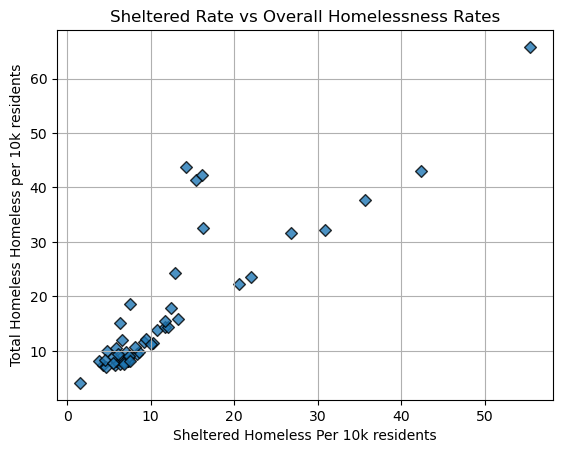

In [19]:
# Create scatter plot showing relationship between sheltered homeless population rate and total homeless population rate

plt.scatter(     
    homeless_reduced_01["ShelteredPer10k"],
    homeless_reduced_01["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,
)

# Augment
plt.title("Sheltered Rate vs Overall Homelessness Rates")
plt.xlabel("Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless Homeless per 10k residents")
plt.grid(True)

# Show plot
plt.show()

### Scatterplot showing Total Per Capita homeless by state compared to Percent Homeless Population that are sheltered

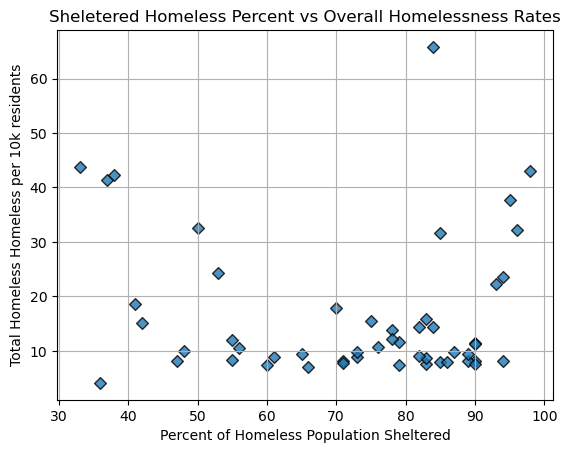

In [20]:
# Create scatter plot showing relationship between sheltered percent of homeless population
# and chronic homeless population rate

plt.scatter(     
    homeless_reduced_01["percent population sheltered"],
    homeless_reduced_01["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Sheletered Homeless Percent vs Overall Homelessness Rates")
plt.xlabel("Percent of Homeless Population Sheltered")
plt.ylabel("Total Homeless Homeless per 10k residents")
plt.grid(True)


# Show plot
plt.show()

## Create scatterplots for second merged dataframe

### Scatterplot showing Total Per Capita homeless by state compared to Sheltered Homeless Per Capita

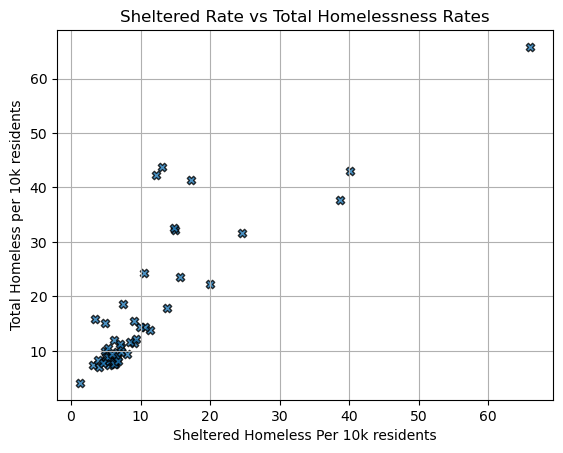

In [21]:
# Create scatter plot showing relationship scores between sheltered homeless population rate 
# and total homeless population rate

plt.scatter(     
    homeless_reduced_02["ShelteredPer10k"],
    homeless_reduced_02["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="X", 
    alpha=0.8,
)

# Augment
plt.title("Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)

# Show plot
plt.show()

### Scatterplot showing Total Per Capita homeless by state compared to Indivduals Sheltered Per Capita

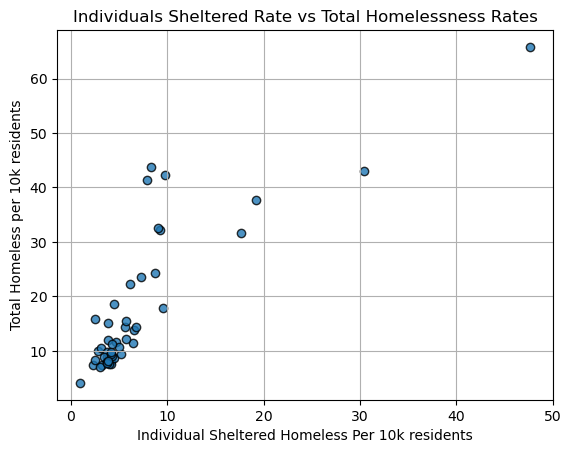

In [22]:
# Create scatter plot showing relationship scores between individual sheltered homeless population rate 
# and total homeless population rate

plt.scatter(     
    homeless_reduced_02["IndvShelteredPer10k"],
    homeless_reduced_02["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
)

# Augment
plt.title("Individuals Sheltered Rate vs Total Homelessness Rates")
plt.xlabel("Individual Sheltered Homeless Per 10k residents")
plt.ylabel("Total Homeless per 10k residents")
plt.grid(True)

# Show plot
plt.show()

### Creating modified version of plot_linear_regression function entitle plot_linear_regression_02 to do regression analysis on oreder pairs below

In [23]:
# Creating modified egression analysis for each of the pairs below.

# Define a function
def plot_linear_regression_02(x_values, y_values, x_axis, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

## Creating linear regressions for first merged dataframe

### Linear regression comparing Total Homeless Per Capita to Sheltered Homeless Per Capita

The r-squared value is: 0.7561227976897767
The r value is: 0.8695532172844723
The p value is: 1.2540604033265988e-16


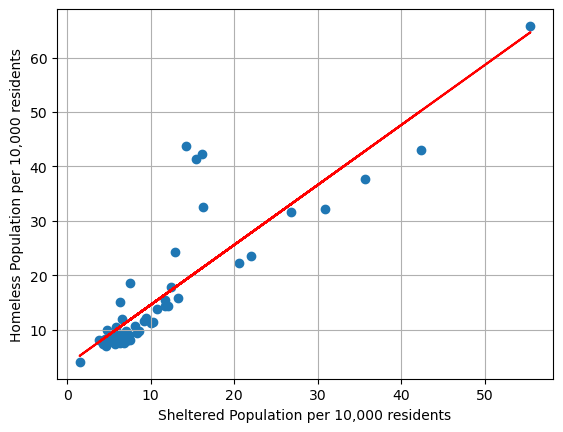

In [24]:
# Linear regression comparing total homeless rate by state as a function of sheltered homeless rate by state

x_values = homeless_reduced_01["ShelteredPer10k"]
y_values = homeless_reduced_01["Per10kResidents"]
plot_linear_regression_02(x_values, y_values, "Sheltered Population per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

Looking at this regression, we can see there is a strong positive correlation between total homeless per capita in a state and sheltered homeless per capita with an r-value of .86 and an r-squared of .75. Moreover our p-value is well below the threshold of .05 where the null H0 hypothesis, that there is no relationship between rates of homeless sheltered and total homeless population, can be maintained. Therefore we must conclude here that H1 is correct and there is a clear demonstrable relationship between rates of homeless sheltered and overall homeless population.

### Linear regression comparing Total Homeless Per Capita to Percent Homeless Sheltered

The r-squared value is: 0.007556228625647323
The r value is: -0.08692657030878029
The p value is: 0.5441563031972827


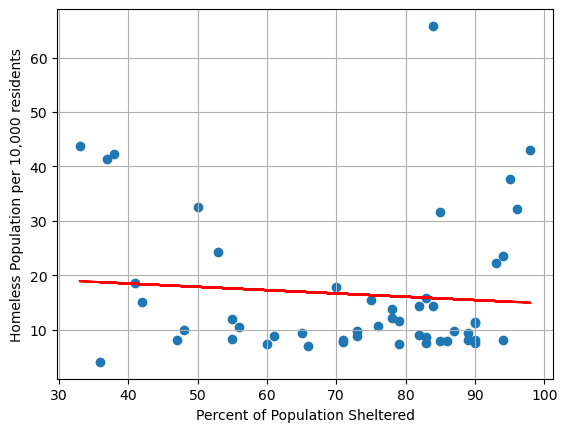

In [25]:
# Linear regression comparing total homeless rate by state as a funciton of percent homeless sheltered by state
x_values = homeless_reduced_01["percent population sheltered"]
y_values = homeless_reduced_01["Per10kResidents"]
plot_linear_regression_02(x_values, y_values, "Percent of Population Sheltered", "Homeless Population per 10,000 residents", (6,-10))

Looking at this second regression would seem to slightly indicate almost the reverse of the previous one. There is a tiny negative correlation between percent of homeless population sheltered and overall homeless population per capita. But the r-vale of -.08 is very small and the p-value of .54 is vastly above the threshold that we could jettision our null H0 hypothesis. This would seem to indicate that the relationship between the percent of homeless population sheltered and overall homelessness is a wash.


## Creating linear regressions for second merged dataframe

### Linear regression comparing Total Homeless Per Capita to Sheltered Homeless Per Capita

The r-squared value is: 0.7151465288187515
The r value is: 0.8456633661326187
The p value is: 5.785291209689986e-15


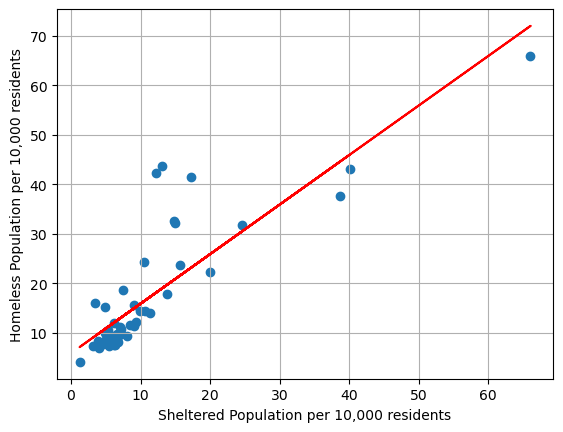

In [26]:
# Linear regression comparing total homeless rate by state as a function of sheltered homeless rate by state

x_values = homeless_reduced_02["ShelteredPer10k"]
y_values = homeless_reduced_02["Per10kResidents"]
plot_linear_regression_02(x_values, y_values, "Sheltered Population per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

Looking at this regression from the second merge, we can see there is a strong positive correlation between total homeless per capita in a state and sheltered homeless per capita with an r-value of .83 and r-squared of .71. Again, our p-value is well below the threshold of .05 where the null H0 hypothesis, that there is no relationship to rates of homeless sheltered and total homeless population can be maintained. Therefore we must conclude here that H1 is correct and there is a clear demonstrable relationship between rates of homeless sheltered and overall homeless population.

### Linear regression comparing Total Homeless Per Capita to Individuals Sheltered Per Capita

The r-squared value is: 0.6793874926254426
The r value is: 0.8242496543071417
The p value is: 1.0743740428955462e-13


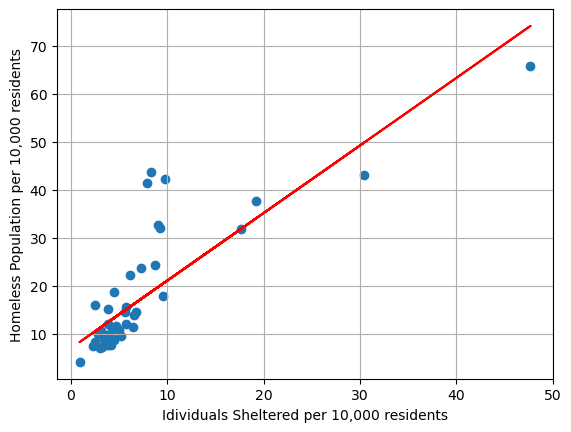

In [27]:
# Linear regression comparing total homeless rate by state as a function of rate of indididuals homeless sheltered by state

x_values = homeless_reduced_02["IndvShelteredPer10k"]
y_values = homeless_reduced_02["Per10kResidents"]
plot_linear_regression_02(x_values, y_values, "Idividuals Sheltered per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

Looking at another regression from our second merge, we can see there is a strong positive correlation between total homeless per capita in a state and sheltered individual homeless per capita with an r-value of .82 and r-squared of .67. Again, our p-value is well below the threshold of .05 where the null H0 hypothesis, that there is no relationship to rates of individual sheltered homeless and total homeless population can be maintained. Therefore we must conclude here that H1 is correct.


### Linear regression comparing Total Homeless Per Capita to Families Sheltered Per Capita

The r-squared value is: 0.5689601558601611
The r value is: 0.7542944755598845
The p value is: 1.6463624832990666e-10


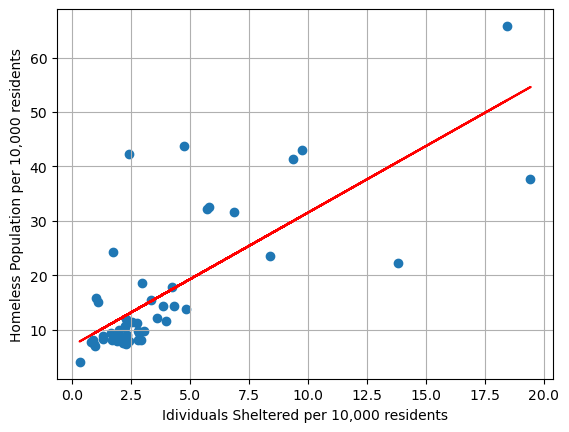

In [28]:
# Linear regression comparing total homeless rate to rate of sheltered families by state

x_values = homeless_reduced_02["FamsShelteredPer10k"]
y_values = homeless_reduced_02["Per10kResidents"]
plot_linear_regression_02(x_values, y_values, "Idividuals Sheltered per 10,000 residents", "Homeless Population per 10,000 residents", (50,-50))

Looking at this regression from our second merge, we can see there is a positive correlation between total homeless per capita in a state and sheltered families per capita with an r-value of .75 and r-squared of .56. Again, our p-value is well below the threshold of .05 where the null H0 hypothesis can be maintained. Therefore we must conclude here that H1 is correct.